<a href="https://colab.research.google.com/github/Mainakdeb/deceptive-digits/blob/main/deceptive-digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
workers = 2
batch_size = 64
image_size = 64
nc = 1
nz = 100
ngf = 64
ndf = 64
lr = 2e-4
beta1 = 0.5
ngpu = 1

transforms = transforms.Compose(
    [
     transforms.Resize(image_size),
     transforms.RandomRotation(25),
     transforms.ToTensor(),
     transforms.Normalize(
         [0.5 for _ in range(nc)], 
         [0.5 for _ in range(nc)]
         )
    ]
)

dataset = datasets.MNIST(root="/dataset/", train=True, transform=transforms, download=True)

dataloader = DataLoader(dataset, batch_size = batch_size, shuffle=True, drop_last=True)

In [23]:
device

device(type='cuda')

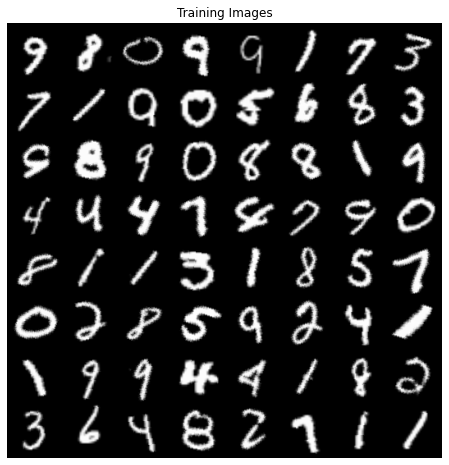

In [24]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))